### 進め方
---
1. 元データを読み込む
2. 300件のデータを分割する
    * 210件(70%)を学習用(トレーニング)データ
    * 90件(30%)をテスト用データ
3. 分類器(今回はロジスティック回帰)にデータを学習(fit)させる
    * 70%のデータで学習
4. モデルをテストする(正答率が算出される)
    * 30%のデータでテスト

### 1. データの読み込み

In [2]:
import pandas as pd
df = pd.read_csv('wine.csv')

##### データ概要

In [4]:
df.head()

,酒石酸,酢酸,クエン酸,残糖,塩化ナトリウム,遊離SO2,総SO2,密度,pH,硫化カリウム,アルコール度数,評価
0,6.8,0.63,0.12,3.8,0.099,16.0,126.0,0.99690,3.28,0.61,9.5,0
1,9.9,0.50,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,0
2,8.3,0.26,0.42,2.0,0.080,11.0,27.0,0.99740,3.21,0.80,9.4,0
3,6.8,0.62,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
4,7.9,0.58,0.23,2.3,0.076,23.0,94.0,0.99686,3.21,0.58,9.5,0


#### データの可視化

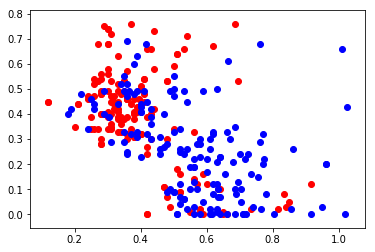

In [3]:
# グラフにプロットしてみよう
import matplotlib.pyplot as plt

# 高評価ワインのデータのみ取得
df1 = df[df['評価'] == 1]
# 低評価ワインのデータのみ取得
df0 = df[df['評価'] == 0]

plt.scatter(df1["酢酸"], df1["クエン酸"], color='red')
plt.scatter(df0["酢酸"], df0["クエン酸"], color='blue')
plt.show()

#### df.ilocというデータから値を取り出す
---
元になるデータセットから特徴行列Xと目的変数yを取り出したい。
今まではpandasのDataFrameで列の値を抽出するには、

** df[["アルコール度数","密度"]] **　のようにカラム名を指定した。
しかし、11種類もある名前を列挙するのは面倒である。

df.liocからアクセスすれば、行と列の数字（インデックス番号）からデータフレームを取り出すことができる

---
[取り出す行, 取り出す列]を指定する
[: , :-1]は「行の全て、列は初めから最後ひとつ前まで」という意味
→最後の列は「評価」であるため


In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#### データをトレーニング用、評価用に分割

In [5]:
from sklearn.model_selection import train_test_split
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.3, random_state=0,
)

#### データの分割　train_test_aprit
---
データセットから取り出した X y をさらに、「トレーニング用」と「テスト用」にデータ分割します。

データセットの全てを使って学習（トレーニング）して、同じデータでテストをしては意味がありません。
テストの答えを元に分類器が学習してしまうので、不用意にスコアが高くなってしまいます。

それを避けるために、ここで train_test_split 関数を使ってデータ分割をしています。
train_test_split 関数はデータをランダムに、好きの割合で分割できる便利な関数です。

---
* X_train, X_test, y_train, y_testの４種類に分ける
    - トレーニング用
        - 特徴行列
        - 目的変数
    - テスト用
        - 特徴行列
        - 目的変数

(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.3, random_state=0,
)

* test-size= テスト用データの割合
* random_state= データを分割する際の乱数のシード値
    - 同じ結果が返るように0を指定しているが、普段はしていない

#### sklearnで分類器をインポート

In [7]:
from sklearn.linear_model import LogisticRegression

#### 分類器を初期化する
---
#### ハイパーパラメータC
モデルの過学習を防ぐ、** 逆正則化パラメータ **

Cの値が大きければ大きいほど過学習に陥りやすい。しかし、小さすぎると学習にならない。C=1000が最適な値かどうかもわからない。

学習モデルによって、ハイパーパラメータの種類や量は異なる。

In [8]:
lr = LogisticRegression(C=1000)

#### トレーニングデータで学習する
---
lr.fit()で特徴行列と目的変数で学習

In [9]:
lr.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### テストデータでスコア測定
---
lr.scor()でデータを元にスコアを0~1で返す

In [10]:
lr.score(X_test, y_test)

0.83333333333333337

** 結果 **　正答率83.3%